In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
enhanced_df = pd.read_csv('data/user_churn_risk_analysis.csv')
enhanced_df

,Unnamed: 0,user_id,churn_score,risk_category,is_likely_churn,risk_velocity,primary_risk_drivers,estimated_days_to_churn
0,0,1515915625519380000,56.081821,Low,0,0.416508,NaN,90.068179
1,1,1515915625513230000,68.162999,Medium,1,0.489262,"rfm, behavioral, purchase",42.077001
2,2,1515915625519010000,55.207104,Low,0,0.396827,"behavioral, temporal",92.942896
3,3,1515915625510740000,54.089657,Low,0,0.425902,behavioral,73.060343
4,4,1515915625519320000,52.755496,Low,0,0.382798,temporal,95.394504
...,...,...,...,...,...,...,...,...
13348,13348,1515915625610980000,53.818250,Low,0,0.425357,"rfm, engagement, behavioral, temporal",94.331750
13349,13349,1515915625610990000,57.881088,Medium,1,0.445036,"rfm, engagement, behavioral, purchase, temporal",62.358912
13350,13350,1515915625611000000,55.990317,Low,0,0.439591,"rfm, engagement, behavioral, temporal",84.159683
13351,13351,1515915625611010000,59.929003,Medium,1,0.461583,"rfm, engagement, behavioral, temporal",53.310997


In [15]:
# Basic statistics for numerical columns
numerical_stats = enhanced_df[['churn_score', 'risk_velocity', 'estimated_days_to_churn']].describe()
print("Basic Statistics:")
print(numerical_stats)

Basic Statistics:
        churn_score  risk_velocity  estimated_days_to_churn
count  13353.000000   13353.000000             13353.000000
mean      58.608127       0.432761                64.400018
std        8.930230       0.046737                26.122411
min       33.984723       0.235186                 7.000000
25%       54.020741       0.414653                48.625404
50%       57.491027       0.436266                61.082501
75%       65.302442       0.461999                80.894936
max       97.589130       0.698462               146.482570


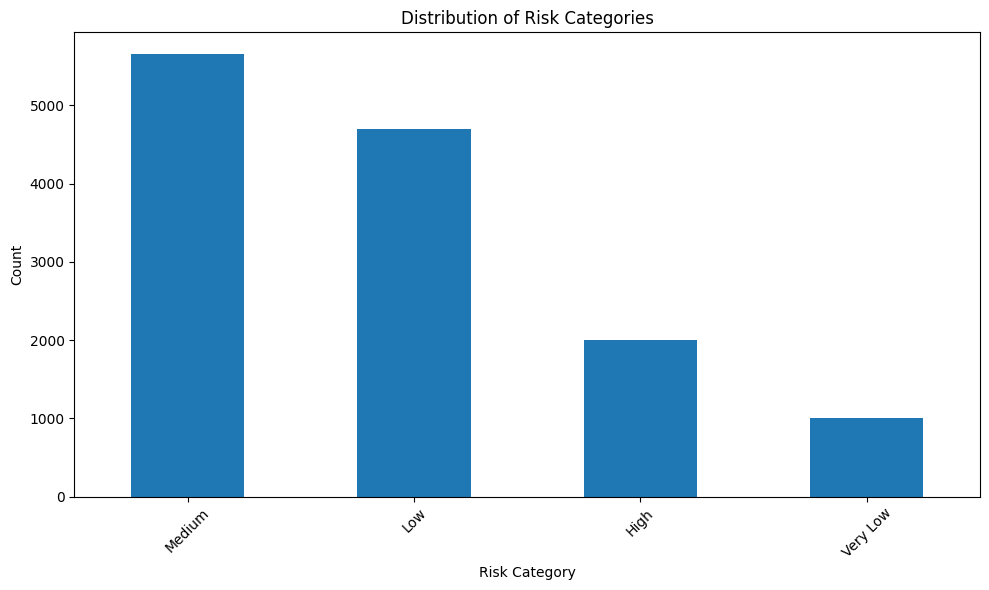


Risk Category Percentages:
risk_category
Medium      42.32
Low         35.21
High        14.96
Very Low     7.51
Name: count, dtype: float64


In [16]:
# 1. Risk Category Distribution
plt.figure(figsize=(10, 6))
risk_dist = enhanced_df['risk_category'].value_counts()
risk_dist.plot(kind='bar')
plt.title('Distribution of Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Risk category percentages
risk_percentages = (risk_dist / len(enhanced_df) * 100).round(2)
print("\nRisk Category Percentages:")
print(risk_percentages)

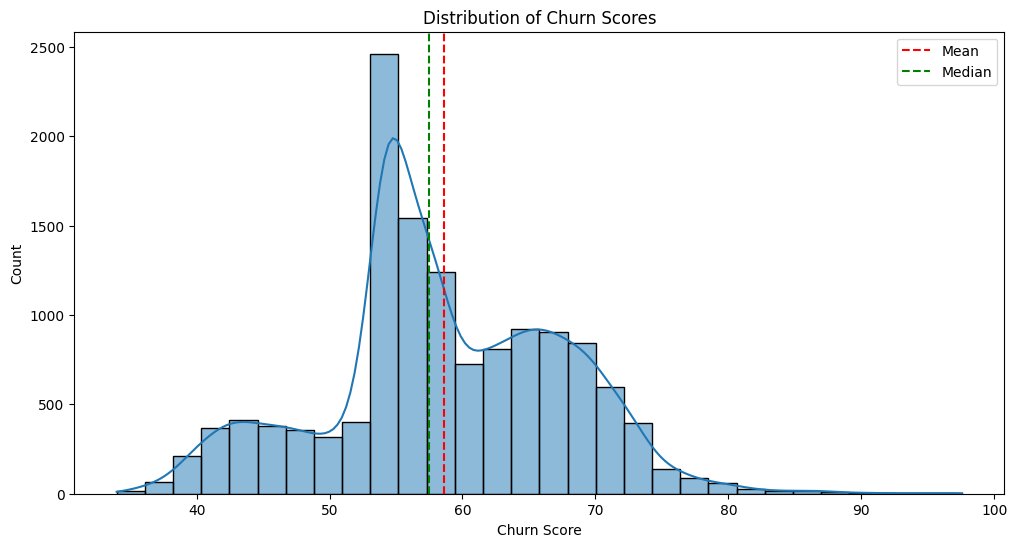

In [17]:
# 2. Churn Score Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=enhanced_df, x='churn_score', bins=30, kde=True)
plt.axvline(enhanced_df['churn_score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(enhanced_df['churn_score'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribution of Churn Scores')
plt.xlabel('Churn Score')
plt.ylabel('Count')
plt.legend()
plt.show()

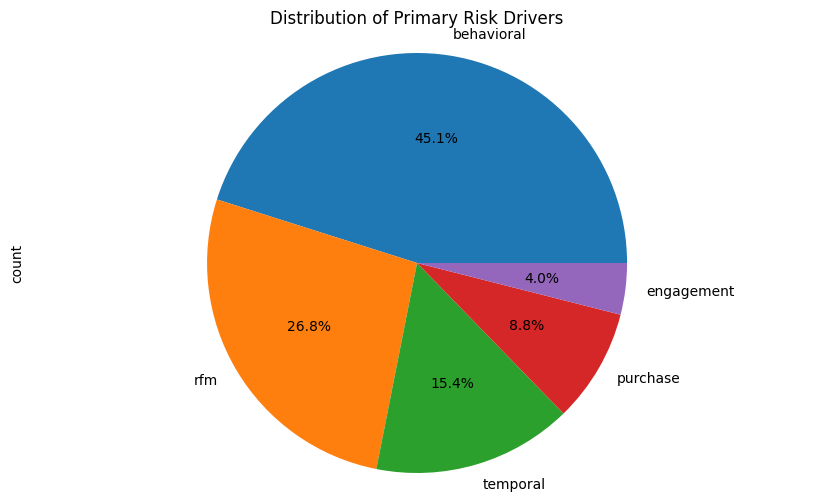


Risk Driver Statistics:
primary_risk_drivers
behavioral    9260
rfm           5499
temporal      3159
purchase      1798
engagement     813
Name: count, dtype: int64


In [18]:
# 3. Risk Drivers Analysis
drivers = enhanced_df['primary_risk_drivers'].str.split(', ').explode()
driver_counts = drivers.value_counts()

plt.figure(figsize=(10, 6))
driver_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Primary Risk Drivers')
plt.axis('equal')
plt.show()

print("\nRisk Driver Statistics:")
print(driver_counts)

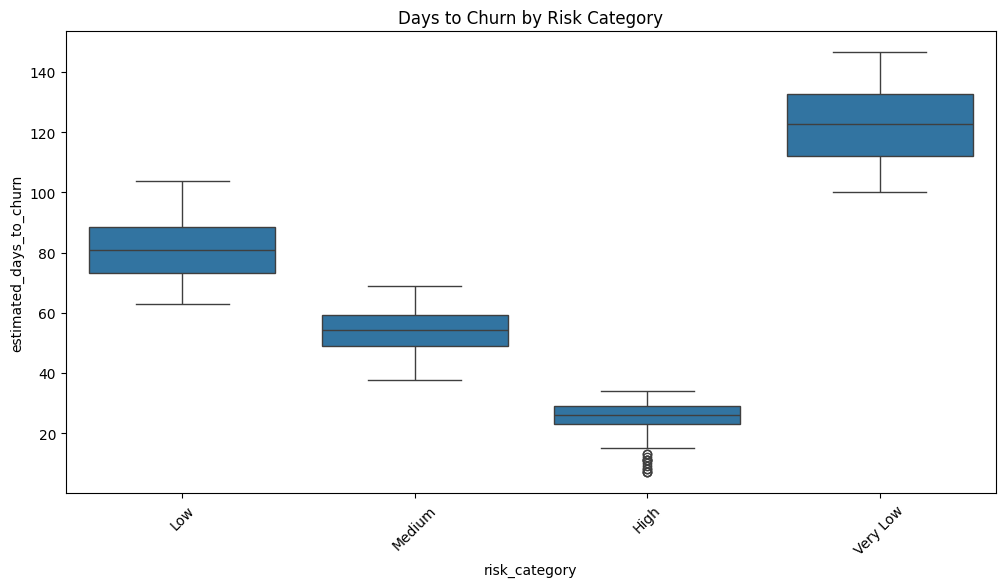


Days to Churn by Risk Category:
                     mean        std         min         max
risk_category                                               
High            25.734430   4.482092    7.000000   33.960871
Low             80.881688   9.306228   63.087621  103.699466
Medium          54.035399   6.844176   37.848673   68.979126
Very Low       122.514501  11.900968  100.046739  146.482570


In [19]:
# 4. Days to Churn Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='risk_category', y='estimated_days_to_churn', data=enhanced_df)
plt.title('Days to Churn by Risk Category')
plt.xticks(rotation=45)
plt.show()

# Calculate days to churn statistics by risk category
days_by_risk = enhanced_df.groupby('risk_category')['estimated_days_to_churn'].agg(['mean', 'std', 'min', 'max'])
print("\nDays to Churn by Risk Category:")
print(days_by_risk)

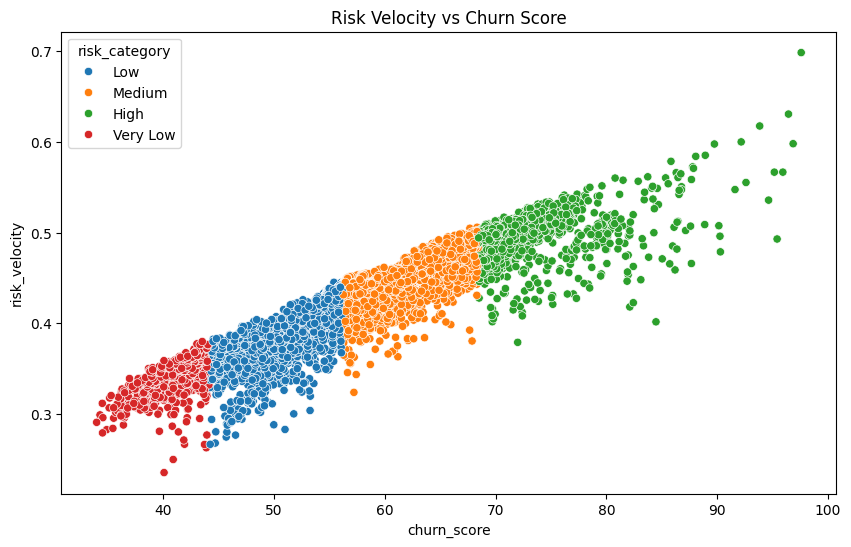

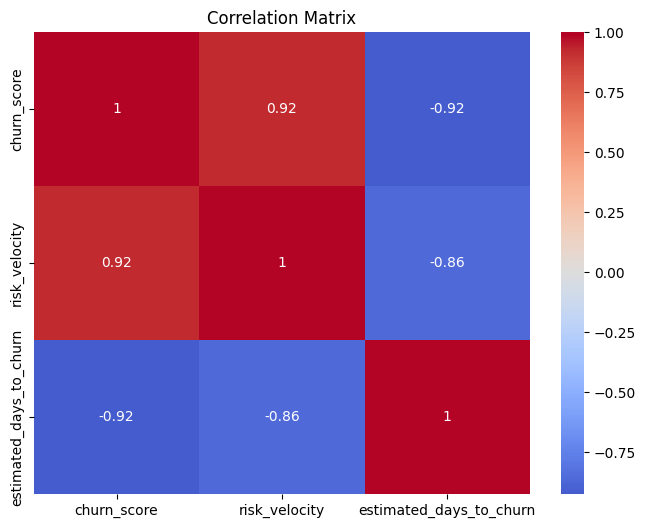

In [20]:
# 5. Risk Velocity Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=enhanced_df, x='churn_score', y='risk_velocity', hue='risk_category')
plt.title('Risk Velocity vs Churn Score')
plt.show()

# Calculate correlation matrix
correlation = enhanced_df[['churn_score', 'risk_velocity', 'estimated_days_to_churn']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

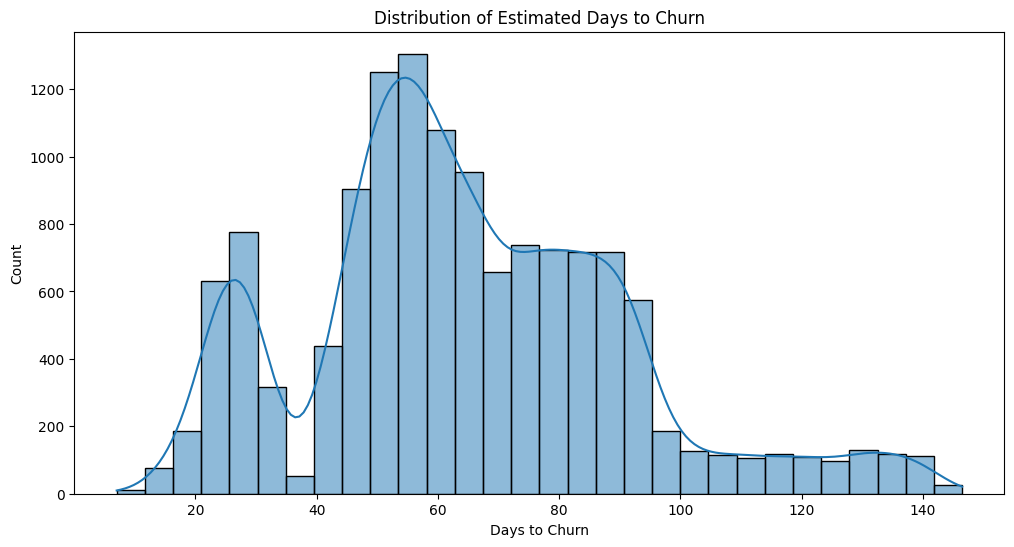

In [21]:
# 6. Time-based Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=enhanced_df, x='estimated_days_to_churn', bins=30, kde=True)
plt.title('Distribution of Estimated Days to Churn')
plt.xlabel('Days to Churn')
plt.ylabel('Count')
plt.show()


Time-based Metrics:
Avg Days to Churn: 64.40
Median Days to Churn: 61.08
Std Days to Churn: 26.12
% Users Churning within 30 days: 12.30


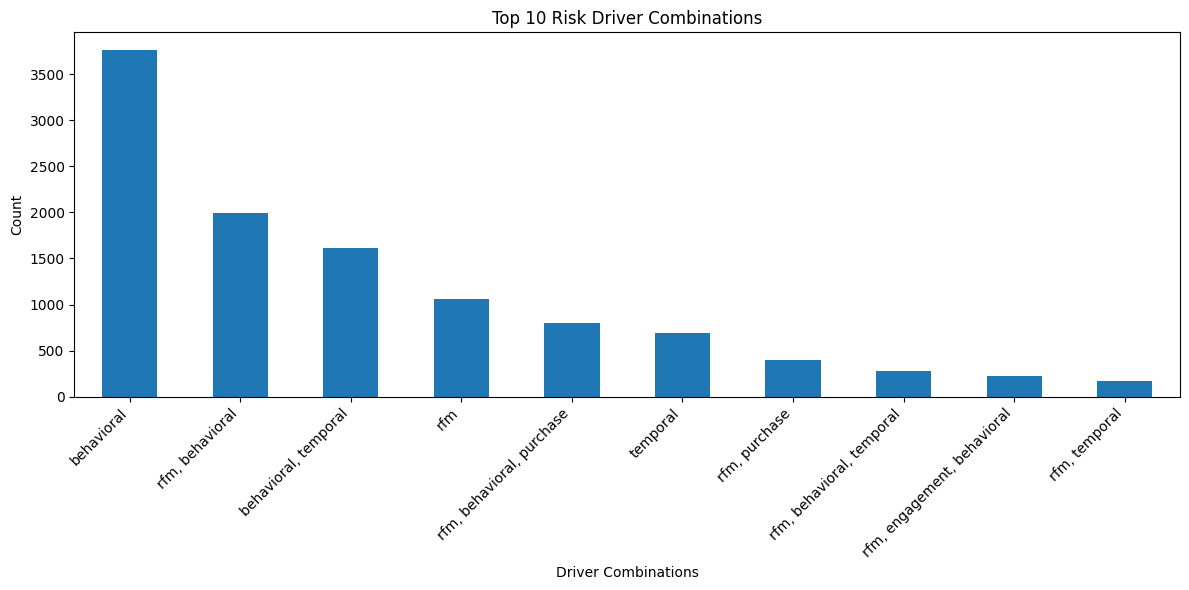


Top Risk Driver Combinations:
primary_risk_drivers
behavioral                     3764
rfm, behavioral                1990
behavioral, temporal           1618
rfm                            1065
rfm, behavioral, purchase       800
temporal                        691
rfm, purchase                   403
rfm, behavioral, temporal       280
rfm, engagement, behavioral     230
rfm, temporal                   171
Name: count, dtype: int64


In [22]:
# Calculate key time-based metrics
time_metrics = {
    'Avg Days to Churn': enhanced_df['estimated_days_to_churn'].mean(),
    'Median Days to Churn': enhanced_df['estimated_days_to_churn'].median(),
    'Std Days to Churn': enhanced_df['estimated_days_to_churn'].std(),
    '% Users Churning within 30 days': (enhanced_df['estimated_days_to_churn'] <= 30).mean() * 100
}
print("\nTime-based Metrics:")
for metric, value in time_metrics.items():
    print(f"{metric}: {value:.2f}")

# 7. Risk Driver Combinations
driver_combinations = enhanced_df['primary_risk_drivers'].value_counts().head(10)
plt.figure(figsize=(12, 6))
driver_combinations.plot(kind='bar')
plt.title('Top 10 Risk Driver Combinations')
plt.xlabel('Driver Combinations')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop Risk Driver Combinations:")
print(driver_combinations)

In [23]:
# 8. Statistical Tests
# Test for normality of churn scores
_, p_value = stats.normaltest(enhanced_df['churn_score'])
print("\nStatistical Tests:")
print(f"Churn Score Normality Test p-value: {p_value:.4f}")

# ANOVA test for days_to_churn across risk categories
f_stat, p_value = stats.f_oneway(*[group['estimated_days_to_churn'].values 
                                  for name, group in enhanced_df.groupby('risk_category')])
print(f"ANOVA test p-value for days_to_churn across risk categories: {p_value:.4f}")


Statistical Tests:
Churn Score Normality Test p-value: 0.3394
ANOVA test p-value for days_to_churn across risk categories: 0.0000


In [24]:
# 9. Summary Insights
print("\nKey Insights:")
print(f"- {(enhanced_df['is_likely_churn'].mean()*100):.1f}% of users are likely to churn")
print(f"- Most common risk driver: {driver_counts.index[0]}")
print(f"- Average days to churn: {enhanced_df['estimated_days_to_churn'].mean():.1f} days")
print(f"- Correlation between churn_score and risk_velocity: {correlation.iloc[0,1]:.2f}")


Key Insights:
- 57.3% of users are likely to churn
- Most common risk driver: behavioral
- Average days to churn: 64.4 days
- Correlation between churn_score and risk_velocity: 0.92
